# Handwritten Digit Recognition using CNN

Importing necessary Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Importing the data and splitting it into trainig and testing data sets

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()
print(X_train.shape)
print(X_test.shape)
print(X_train[0].shape)


(60000, 28, 28)
(10000, 28, 28)
(28, 28)


Visualizing the Data

<Figure size 640x480 with 0 Axes>

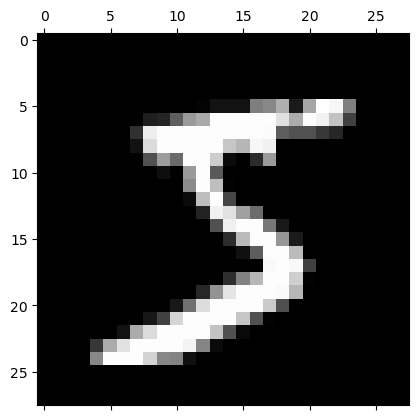

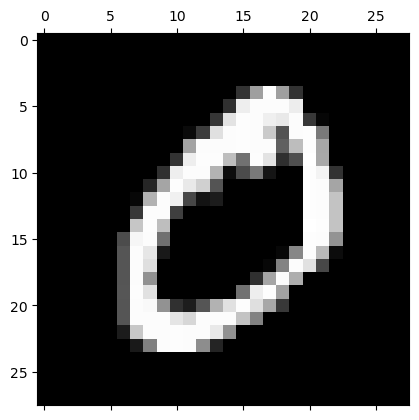

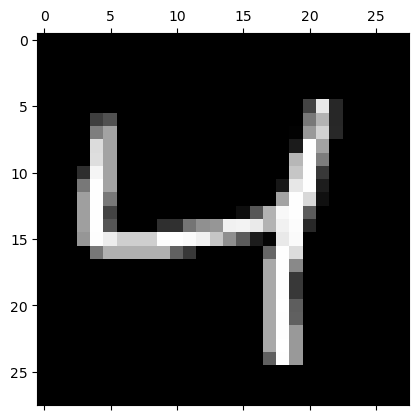

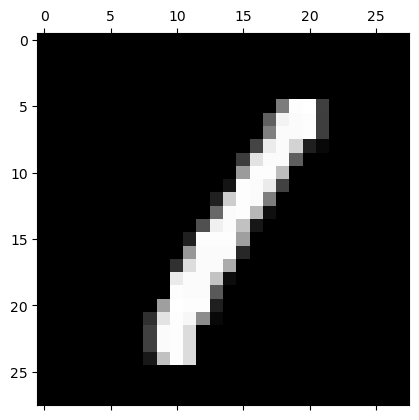

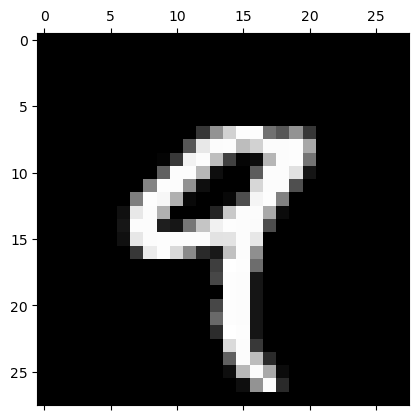

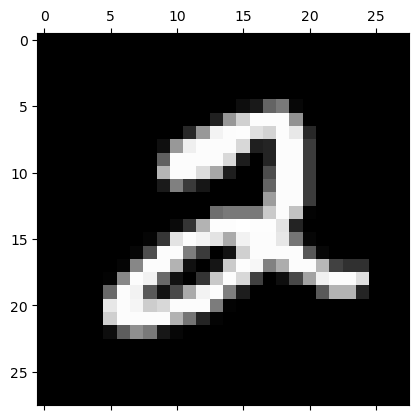

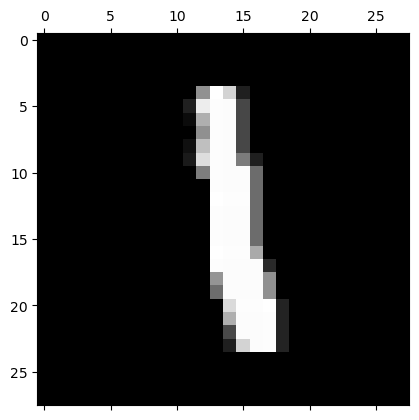

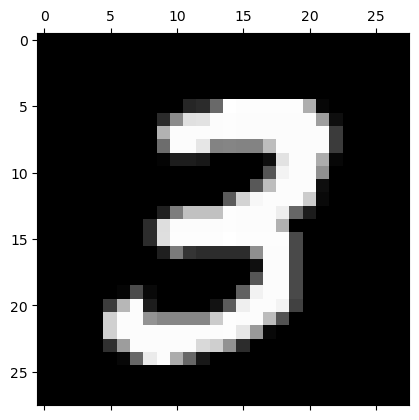

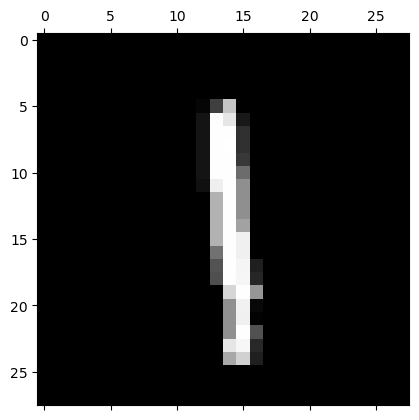

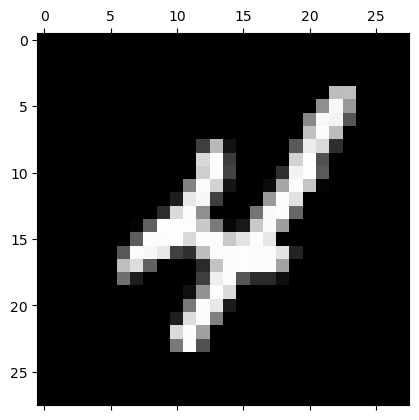

In [3]:
plt.gray()
for i in range(10):
    plt.matshow(X_train[i])

Normalizing the training data set

In [4]:
len(X_train.data)  # total number of inputs

print(X_train[0]/255)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the model


In [5]:
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(20, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 32s 16ms/step - loss: 0.4530 - accuracy: 0.9246
Epoch 2/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0832 - accuracy: 0.9753
Epoch 3/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0607 - accuracy: 0.9812
Epoch 4/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0502 - accuracy: 0.9850
Epoch 5/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0422 - accuracy: 0.9872


Model Evaluation

313/313 [==============================] - 2s 7ms/step


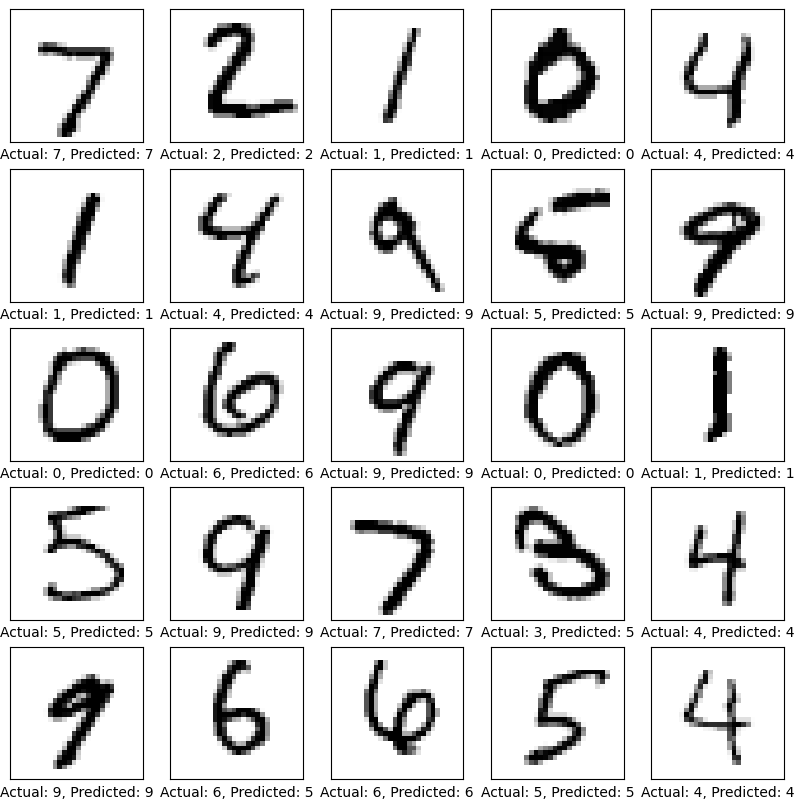

In [6]:
predictions = model.predict(X_test)

plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.binary)
    actual_value = y_test[i]
    predicted_value = predictions[i].argmax()
    plt.xlabel(f'Actual: {actual_value}, Predicted: {predicted_value}')

plt.show()

Confusin matrix for visualizing the accuracy of model

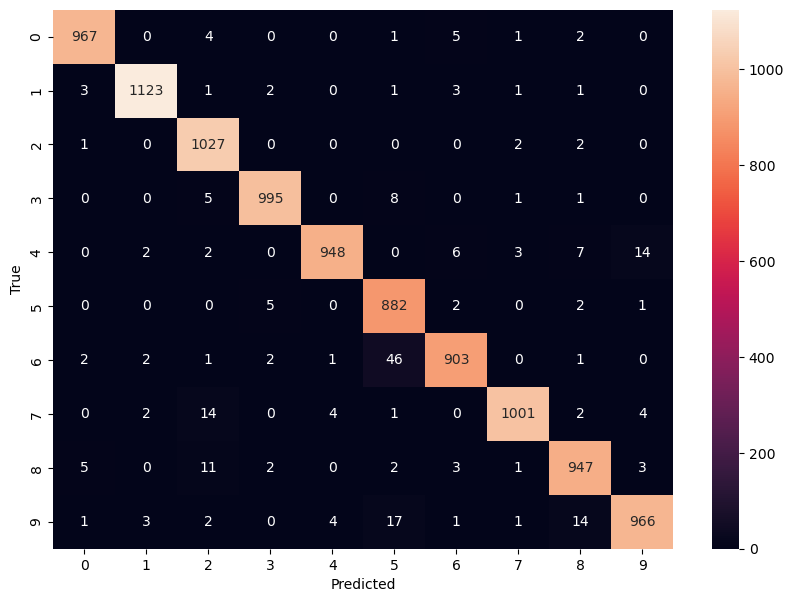

In [7]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming predictions is an array of class labels predicted by your model
y_pred = np.argmax(predictions, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
import seaborn as sn


plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



In [8]:
from sklearn.metrics import accuracy_score

# Assuming y_pred is the predicted labels
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 97.59%
